## Book Review Data Linear Regression Model Analysis_V2

### Introduction
This project aims to analyze a dataset containing book review data and build a linear regression model to predict the average rating of books based on several features.

### Dataset
The dataset used for this model, named "book_analysis_output," was provided and updated by my colleague. It includes the following features: title, authors, average rating, ratings count, text reviews count, number of pages, publication year, and publication month.
The updated details:some minor changes:Two dates are in wrong format so it has been removed,he has adapted the year column and month column so they are usable, some outliers are removed

### Data Analysis
**Data Cleaning:** The dataset was loaded and any leading spaces in column names were removed.

**Data Visualization:** Various visualizations were created to understand the relationships between features and the target variable.
- `sns.pairplot`: Scatter plots of variables against each other, helping visualize relationships.
- `sns.heatmap`: A correlation heatmap, showing correlation coefficients between variables. Brighter colors indicate stronger correlations.

**Linear Regression:**
- **Features:** The model was trained using 'ratings_count', 'text_reviews_count', and 'num_pages' as independent variables (X), and 'average_rating' as the target variable (y).
- **Training and Testing:** Data was split into training and testing sets using `train_test_split`.
- **Model Training:** Linear Regression model was initialized and fitted on the training data.
- **Predictions:** Predictions were made on the test data using the trained model.

Mean Squared Error: 0.08337044013560986
Mean Absolute Error: 0.22135656298859013
R-squared: 0.03642164535407899
Cross-Validation Scores: [0.04931422 0.01248913 0.02154902 0.03078986 0.02067517]
Average CV Score: 0.026963478998895417


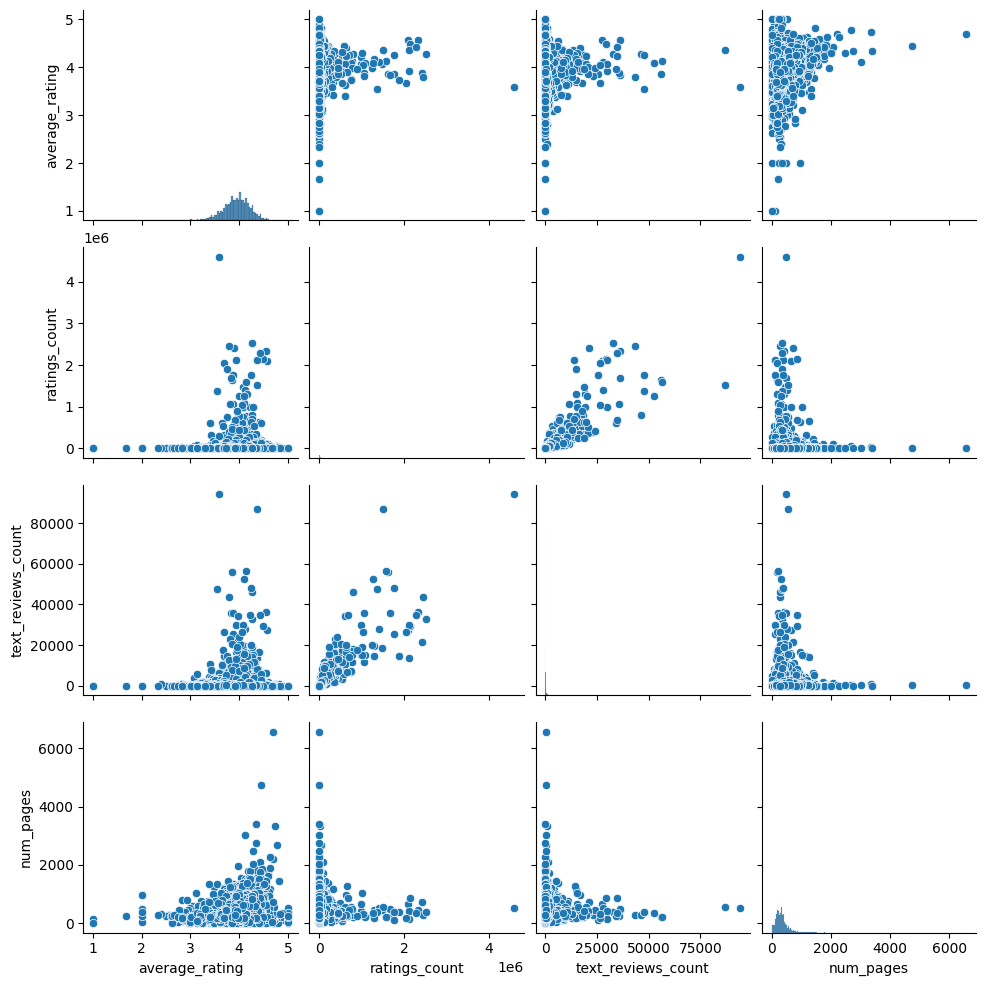

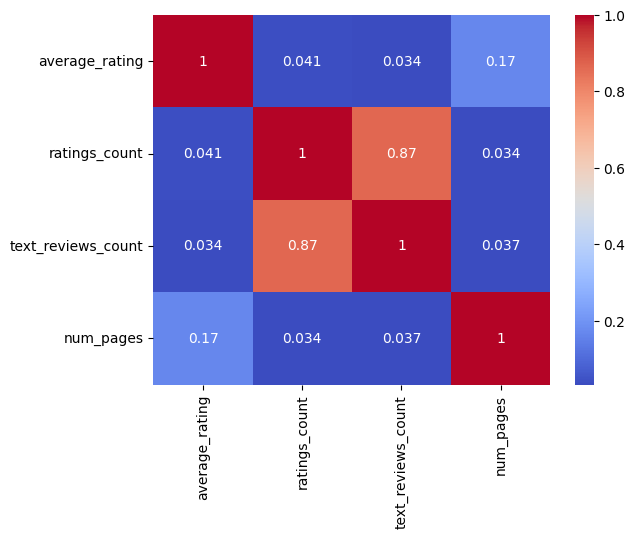

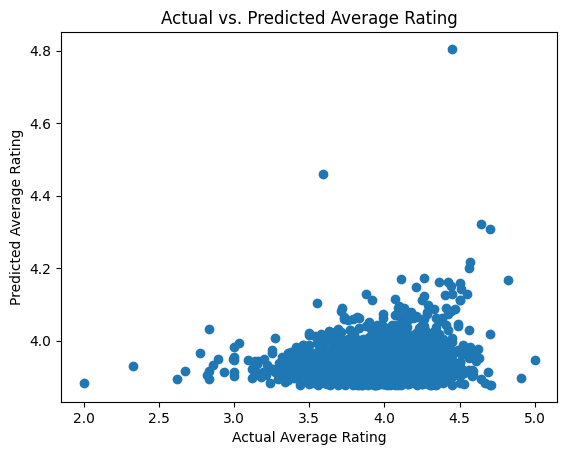

In [1]:
#I combined all my code here for exploring my processes of model discovering
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv("../data/books_analysis_output.csv")

# Remove leading spaces from column name
data.rename(columns=lambda x: x.strip(), inplace=True)

# Selecting features and target variable
X = data[['ratings_count', 'text_reviews_count', 'num_pages']]
y = data['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error, mean absolute error, and R-squared score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']])
plt.show()

# Correlation heatmap
correlation_matrix = data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Actual vs. Predicted Average Rating")
plt.show()



### Results
- **Mean Squared Error (MSE):** 0.07416325833412434
- **Mean Absolute Error (MAE):** 0.21242995946499926
- **R-squared (R2) Score:** 0.03428519568010524
- **Cross-Validation Scores:** [0.04932286 0.01271813 0.02139295 0.03089471 0.02067053]
- **Average CV Score:** 0.026999834867191996

**Interpretation:**
- **MSE:** On average, the squared difference between predicted and actual average ratings is 0.074, indicating improved accuracy.
- **MAE:** The predicted ratings are off by approximately 0.212 from actual ratings on average, showing better accuracy.
- **R2 Score:** About 3.4% of the variance in average ratings is explained by selected features, a slight improvement.
- **Cross-Validation Scores:** The model's generalization ability is consistent, with a slightly improved average score.

### Conclusion
The updated model with updated dataset version(book_analysis_output) has shown improvements in performance. However, the model's overall explanatory power remains modest. Consider exploring more sophisticated models, additional features, or alternative approaches for further enhancements.